# **Practice Project: Insurance Cost Analysis**

In this project, I analyze an insurance dataset using the following parameters:

| Parameter | Description | Content type |
|---|----|---|
| age | Age in years | integer |
| gender | Male or Female | integer (1 or 2) |
| bmi | Body Mass Index | float |
| no_of_children | Number of children | integer |
| smoker | Whether smoker or not | integer (0 or 1) |
| region | US region - NW, NE, SW, SE | integer (1, 2, 3, or 4 respectively) |
| charges | Annual Insurance charges in USD | float |

## Objectives

In this project, I:
 - Loaded the data as a `pandas` DataFrame.
 - Cleaned the data and handled any missing entries.
 - Performed exploratory data analysis (EDA) to identify the attributes that most impact `charges`.
 - Developed single-variable and multi-variable Linear Regression models to predict `charges`.
 - Applied Ridge Regression to refine and improve the performance of the Linear Regression models.

# Setup


For this lab, I will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) to manage the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) to visualize the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

### Importing Required Libraries


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Download the dataset to this lab environment


In [21]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 


In [22]:
df = pd.read_csv(path, header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


I will add the headers to the dataframe, as mentioned in the project scenario.

In [23]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

And replace all `'?'` entries in the dataframe with `NaN` values.


In [24]:
df.replace('?', np.nan, inplace = True)

# Task 2 : Data Wrangling


`dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


I will handle missing data as follows:

- For continuous attributes (e.g., `age`), I will replace missing values with the **mean**.
- For categorical attributes (e.g., `smoker`), I will replace missing values with the **most frequent value**.
- I will update the data types of the respective columns accordingly.
- Finally, I will verify the update using `df.info()`.

In [37]:
# Handle missing data for the categorical attribute (smoker)
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"] = df["smoker"].replace(np.nan, is_smoker)

# Handle missing data for the continuous attribute (age)
mean_age = df['age'].astype('float').mean(axis=0)
df["age"] = df["age"].replace(np.nan, mean_age)

# Update the data types
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In this step, I will round the values in the `charges` column to the nearest 2 decimal places.


In [27]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


# Task 3 : Exploratory Data Analysis (EDA)

I will implement a regression plot to visualize the relationship between the `charges` column and `bmi`.


(0.0, 66902.85800000001)

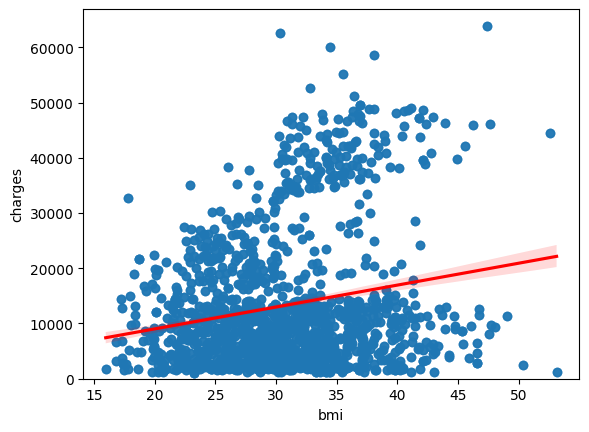

In [28]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

Implement the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='smoker', ylabel='charges'>

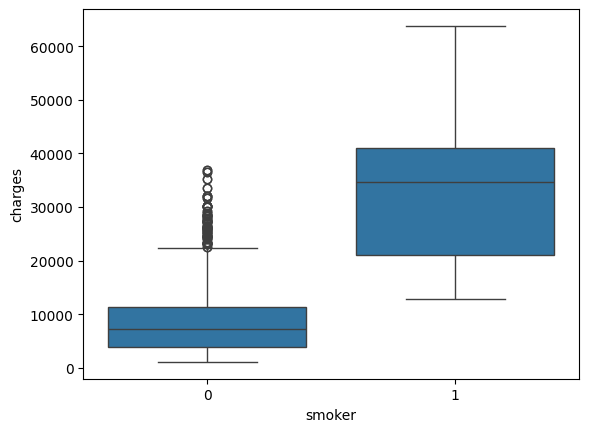

In [29]:
sns.boxplot(x="smoker", y="charges", data=df)

Print the correlation matrix for the dataset.


In [30]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


# Task 4 : Model Development

In this step, I will fit a linear regression model using only the `smoker` attribute to predict the `charges` value.

1.	I will use LinearRegression from sklearn to fit the model. The `smoker` column will be the independent variable, and `charges` will be the dependent variable.

2.	Once the model is fitted, I will calculate the $R^2$ score to measure how well the model fits the data.
	
3.	Then print the $R^2$ score to evaluate the model’s performance.

In [43]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print("$R^2$ score ≈ " + str(lm.score(X, Y)))

$R^2$ score ≈ 0.6221791733924185


•	This explains about 62% of the variation in charges.

•	It shows that being a smoker has a strong impact, but it does not fully explain insurance costs on its own.

---

I will fit a linear regression model using all the other attributes of the dataset to predict the charges value, doing a Multilinear regression.

In [44]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print("$R^2$ score ≈ " + str(lm.score(Z, Y)))

$R^2$ score ≈ 0.7504083820289634


•	Adding more features like age, bmi, and region improves the model, explaining around 75% of the variation.

•	This demonstrates that insurance charges depend on multiple factors combined.

---

I will create a training pipeline that uses StandardScaler(), PolynomialFeatures(), and LinearRegression() to build a model that can predict the charges value using all the other attributes of the dataset.

1.	I will start by using StandardScaler() to standardize the features. This will ensure that all the features have a mean of 0 and a standard deviation of 1, which helps improve model performance.

2.	Then, I will apply PolynomialFeatures() to introduce polynomial terms of the features, capturing more complex relationships between the variables and the target.

3.	Finally, I will use LinearRegression() to fit the model using the transformed features.

4.	I expect to see further improvement in the performance due to the inclusion of polynomial features and scaling.

5.	I will print the $R^2$ score to evaluate the model’s performance.

In [46]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print("$R^2$ score ≈ " + str(r2_score(Y,ypipe)))

$R^2$ score ≈ 0.8452576213500093


•	Using a polynomial regression captures non-linear relationships and interactions, boosting the explained variance to over 84%.

# Task 5 : Model Refinement

In this step, I will split the data into training and testing subsets, keeping 20% of the data reserved for testing.

In [34]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)


In this step, I will initialize a Ridge regressor with the hyperparameter $ \alpha = 0.1 $.

In [47]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print("$R^2$ score ≈ " + str(r2_score(y_test,yhat)))

$R^2$ score ≈ 0.6760807731582404


•	Applying Ridge Regression with $\alpha = 0.1$ helps reduce overfitting, but with linear features only, its performance is similar to simple linear regression.

---

In this step, I will apply a polynomial transformation to the training features with degree = 2.

In [48]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print("$R^2$ score ≈ " + str(r2_score(y_test,y_hat)))

$R^2$ score ≈ 0.7835631107608139


•	Combining Ridge with polynomial features maintains a good balance between model complexity and generalization, resulting in better performance than Ridge alone.

# Final Takeaway

The results clearly show that:

•	Features like **age** and **bmi** have a significant effect on insurance costs.

•	Adding **polynomial features** and scaling the data improves prediction accuracy, as it captures more complex patterns.

•	**Ridge Regression** helps control overfitting when using more variables and polynomial terms.
